For dynamic time warping use LB Q

In [ ]:
!git clone https://github.com/ashleyngomez380/CSCI6370.git

Cloning into 'CSCI6370'...
remote: Enumerating objects: 848, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 848 (delta 1), reused 34 (delta 0), pack-reused 809 (from 2)
Receiving objects: 100% (848/848), 119.15 MiB | 6.84 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (794/794), done.


In [ ]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
'''
classname=["asphalt","concrete","cobblestone","dirt","wood"]
classes=["a","c","coa","d","w"]
data_path="/content/CSCI6370/Asphalt Data"

all_tensors=[]

for class_idx, class_name in enumerate(classes):
    folder_name=classname[class_idx]
    folder_path=os.path.join(data_path,folder_name)
    for i in range(1, 6):  # Iterations 1-5
        file_path = os.path.join(folder_path, f"{class_name}{i}.csv")

        # Load CSV file
        data = pd.read_csv(file_path, header=None).values  # Convert to NumPy array
        #print(f"Loaded {file_path} shape: {data.shape}")
        data_transposed=np.transpose(data[1:801,:])
        data=data_transposed
        print(f"Transposed {file_path} shape: {data.shape}")
        #print(data)


        # Append class label as an extra time step
        class_label = np.full((5, 1), class_idx)  # Shape: [5, 1]
        #print(f"Class label Shape : {class_label.shape}")
        labeled_data = np.concatenate((data, class_label), axis=1)  # Shape: [5,1]
        #print(f"Labeled Data : {labeled_data[0]}")

        # Convert to PyTorch tensor
        tensor_data = torch.tensor(labeled_data.astype(float), dtype=torch.float32)  # Shape: [5,1]

        labeled_data = labeled_data.astype(np.float32)

        all_tensors.append(tensor_data)

# Stack all tensors into final shape: [25, 5, 1003]
final_tensor = torch.stack(all_tensors)  # Shape: [25, 5, 1003]

print(final_tensor.shape)  # Should print: torch.Size([25, 5, 1003])

'''

'\nclassname=["asphalt","concrete","cobblestone","dirt","wood"]\nclasses=["a","c","coa","d","w"]\ndata_path="/content/CSCI6370/Asphalt Data"\n\nall_tensors=[]\n\nfor class_idx, class_name in enumerate(classes):\n    folder_name=classname[class_idx]\n    folder_path=os.path.join(data_path,folder_name)\n    for i in range(1, 6):  # Iterations 1-5\n        file_path = os.path.join(folder_path, f"{class_name}{i}.csv")\n\n        # Load CSV file\n        data = pd.read_csv(file_path, header=None).values  # Convert to NumPy array\n        #print(f"Loaded {file_path} shape: {data.shape}")\n        data_transposed=np.transpose(data[1:801,:])\n        data=data_transposed\n        print(f"Transposed {file_path} shape: {data.shape}")\n        #print(data)\n\n\n        # Append class label as an extra time step\n        class_label = np.full((5, 1), class_idx)  # Shape: [5, 1]\n        #print(f"Class label Shape : {class_label.shape}")\n        labeled_data = np.concatenate((data, class_label), a

In [ ]:
#Save the tensor to download
#torch.save(final_tensor, 'all25samples.pt')

#Input

In [ ]:
X_r=np.load('/content/X_trim.npy')
#Drop the 0 dim
X_r=X_r[:,:,1:]
print('X shape:',X_r.shape)

y=np.load('/content/y_trim.npy')
print('y shape:',y.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/content/X_trim.npy'

In [ ]:
X=X_r.transpose(0,2,1)

print(X.shape)

import torch
X=torch.tensor(X)
print(X.shape)

# Normalizing the Time Series Using Z Score
* Mean =0
* Std=1

In [ ]:
#Using the z score

#Mean
mean_per_sample=torch.mean(X,dim=2)

#Standard Deviation
srd_per_sample=torch.std(X,dim=2)

normalized_series= (X.clone()-mean_per_sample.unsqueeze(-1))/srd_per_sample.unsqueeze(-1)
print(normalized_series.shape)

In [ ]:
#plt.plot(normalized_series[0,0,:],color='k')

#Data we are gonna use


In [ ]:
X=torch.load('X_norm.pt')
y=torch.load('y_lbls.pt',weights_only=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([24, 4, 1000])
torch.Size([6, 4, 1000])
(24,)
(6,)


# Constructing PAA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
#@title LB_Keogh

def bounds(Q_1d, r):
    Ubound = []
    Lbound = []
    length = len(Q_1d)
    for i in range(length):
        start = max(0, i - r)
        end = min(length - 1, i + r)

        window = Q_1d[start:end + 1]
        Ubound.append(max(window))
        Lbound.append(min(window))

    return Ubound, Lbound

def dtw_lb_keogh(Q, C, r):

    n_features, length = Q.shape
    lb_sum = 0

    for feature in range(n_features):
        U, L = bounds(Q[feature], r)
        for i in range(length):
            c_val = C[feature][i]
            if c_val > U[i]:
                lb_sum += (c_val - U[i])**2
            elif c_val < L[i]:
                lb_sum += (c_val - L[i])**2

    return math.sqrt(lb_sum)



Q = np.random.rand(40, 340)
C = np.random.rand(40, 340)
r = 2

distance = dtw_lb_keogh(Q, C, r)
print("Multivariate LB_Keogh Distance:", distance)


Multivariate LB_Keogh Distance: 13.114213272200388


In [ ]:
import string
import random
import bisect

In [ ]:
def transform_data(data, B):
    letters = list(string.ascii_lowercase)

    transformed = []
    for x in data:
        index = bisect.bisect(B, x)  # Finds the right bin index
        transformed.append(letters[index])

    return transformed


def generate_C(length, c_range=(0, 10)):
    c = [round(random.uniform(c_range[0], c_range[1]), 2) for _ in range(length)]

    return c


def generate_C_bar(n, w, c):
  # Ideally n must be divisible by w
  n_w = n//w
  c_bar = []
  for i in range(w):
     range_sum = 0
     start = (n_w * i) + 1
     end = n_w * (i+1)
     for j in range(start, end):
       range_sum += c[j-1]
     c_bar.append(range_sum / n_w)
  return c_bar


#We normalize each time series to have mean of zero and a standard deviation of one before converting it to the PAA representation.

def normalize(data):
    data = np.array(data)
    return (data - data.mean()) / data.std()

In [ ]:

lookup_table = {3: [-.43, .43],
                4: [-.67, 0, .67],
                5: [-.84, -.25, .25, .84],
                6: [-.97, -.43, 0, .43, .97],
                7: [-1.07, -.57, -1.18, .18, .57, 1.07],
                8: [-1.15, -.67, -.32, 0, .32, .67, 1.15],
                9: [-1.22, -.76, -.43, -.14, .14, .43, .76, 1.22],
                10: [-1.28, -.84, -.52, -.25, 0, .25, .52, .84, 1.28]}

In [ ]:
length = 100
C = generate_C(length)
C_bar = generate_C_bar(length, 10, C)
C_bar = normalize(C_bar)
a = 3
B = lookup_table[a]
C_hat = transform_data(C_bar, B)

In [ ]:
C_hat

['b', 'c', 'c', 'a', 'b', 'a', 'c', 'c', 'b', 'a']

In [ ]:
from collections import Counter

def count_subsequences(C_hat, window_size=2):
    subsequences = [
        tuple(C_hat[i:i + window_size])
        for i in range(len(C_hat) - window_size + 1)
    ]
    return Counter(subsequences)


In [ ]:
counts = count_subsequences(C_hat)
print(counts)


Counter({('c', 'c'): 2, ('b', 'a'): 2, ('b', 'c'): 1, ('c', 'a'): 1, ('a', 'b'): 1, ('a', 'c'): 1, ('c', 'b'): 1})


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
#@title Helper funcitons
def sax_bop_vector(sample, w, lookup_table, window_size=2, a=4):
    symbols = []
    for feature in sample:
        feature = normalize(feature)
        paa = generate_C_bar(len(feature), w, feature)
        sax = transform_data(paa, lookup_table[a])
        symbols.extend(sax)
    histogram = count_subsequences(symbols, window_size)
    return histogram

def vectorize_bop(histogram, vocabulary):
    return np.array([histogram.get(sym, 0) for sym in vocabulary], dtype=np.float32)

def build_bop_dataset(X, w, lookup_table, window_size=2, a=4):
    histograms = [sax_bop_vector(sample, w, lookup_table, window_size, a) for sample in X]

    # Build global vocabulary
    all_keys = set()
    for h in histograms:
        all_keys.update(h.keys())
    vocabulary = sorted(all_keys)

    bop_vectors = np.array([vectorize_bop(h, vocabulary) for h in histograms])
    return bop_vectors, vocabulary

def classify_bop_1nn(X_train_vecs, y_train, X_test_vecs):
    predictions = []
    nn_indices = []

    distances = euclidean_distances(X_test_vecs, X_train_vecs)
    for row in distances:
        idx = np.argmin(row)
        predictions.append(y_train[idx])
        nn_indices.append(idx)

    return predictions, nn_indices

def sax_bop_train(X_train, y_train, X_test, y_test, lookup_table, w=10, a=4, window_size=2):

    print("Generating BOP histograms...")
    X_train_histograms = [sax_bop_vector(sample, w, lookup_table, window_size, a) for sample in X_train]

    # Build vocabulary from training only
    vocabulary = sorted(set().union(*[h.keys() for h in X_train_histograms]))

    # Vectorize train and test using same vocab
    X_train_vecs = np.array([vectorize_bop(h, vocabulary) for h in X_train_histograms])
    X_test_histograms = [sax_bop_vector(sample, w, lookup_table, window_size, a) for sample in X_test]
    X_test_vecs = np.array([vectorize_bop(h, vocabulary) for h in X_test_histograms])


    print("Running 1NN classification...")
    y_pred, nn_indices = classify_bop_1nn(X_train_vecs, y_train, X_test_vecs)

    accuracy = sum(y_pred[i] == y_test[i] for i in range(len(y_test))) / len(y_test)
    print(f"BOP + 1NN Accuracy: {accuracy:.2%}")

    return y_pred, nn_indices, X_train_vecs, X_test_vecs, vocabulary

In [ ]:
y_pred, nn_indices, X_train_bop, X_test_bop, vocab = sax_bop_train(
    X_train, y_train, X_test, y_test,
    lookup_table=lookup_table,
    w=5, a=5, window_size=2
)

Generating BOP histograms...
Running 1NN classification...
BOP + 1NN Accuracy: 83.33%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

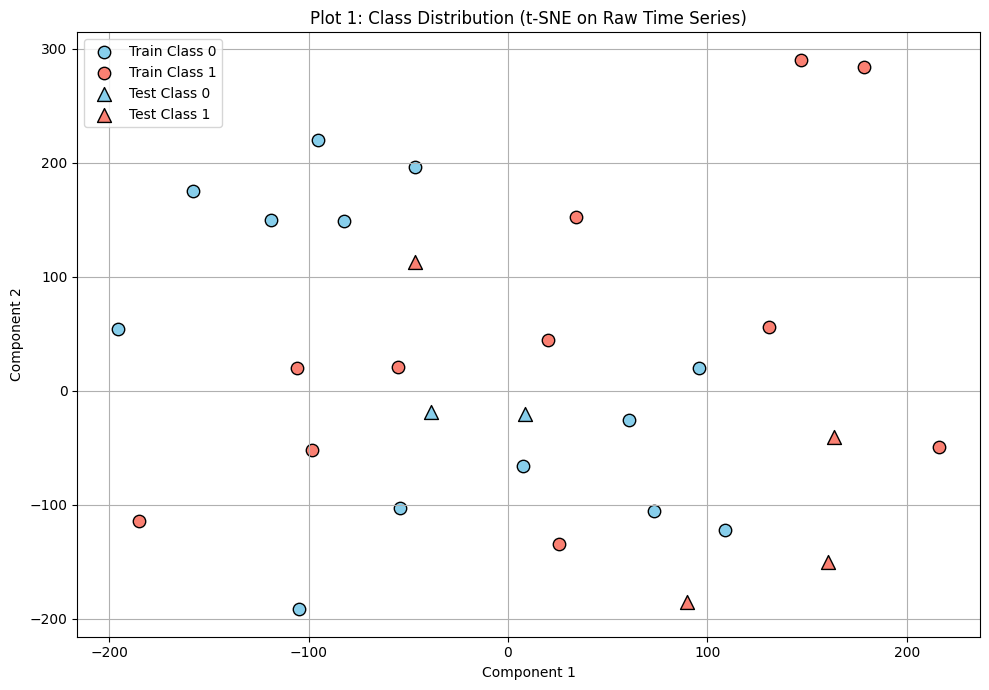

In [ ]:
#@title Plot 1
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

X_flat = X_all.reshape(X_all.shape[0], -1)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

n_train = len(X_train)
X_train_2D = X_tsne[:n_train]
X_test_2D = X_tsne[n_train:]

plt.figure(figsize=(10, 7))
colors = ['skyblue', 'salmon']
labels = ['Class 0', 'Class 1']

for class_val in [0, 1]:
    idx = y_train == class_val
    plt.scatter(X_train_2D[idx, 0], X_train_2D[idx, 1],
                color=colors[class_val], label=f'Train Class {class_val}',
                edgecolor='k', marker='o', s=80)

for class_val in [0, 1]:
    idx = y_test == class_val
    plt.scatter(X_test_2D[idx, 0], X_test_2D[idx, 1],
                color=colors[class_val], label=f'Test Class {class_val}',
                edgecolor='black', marker='^', s=100)

plt.title("Plot 1: Class Distribution (t-SNE on Raw Time Series)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

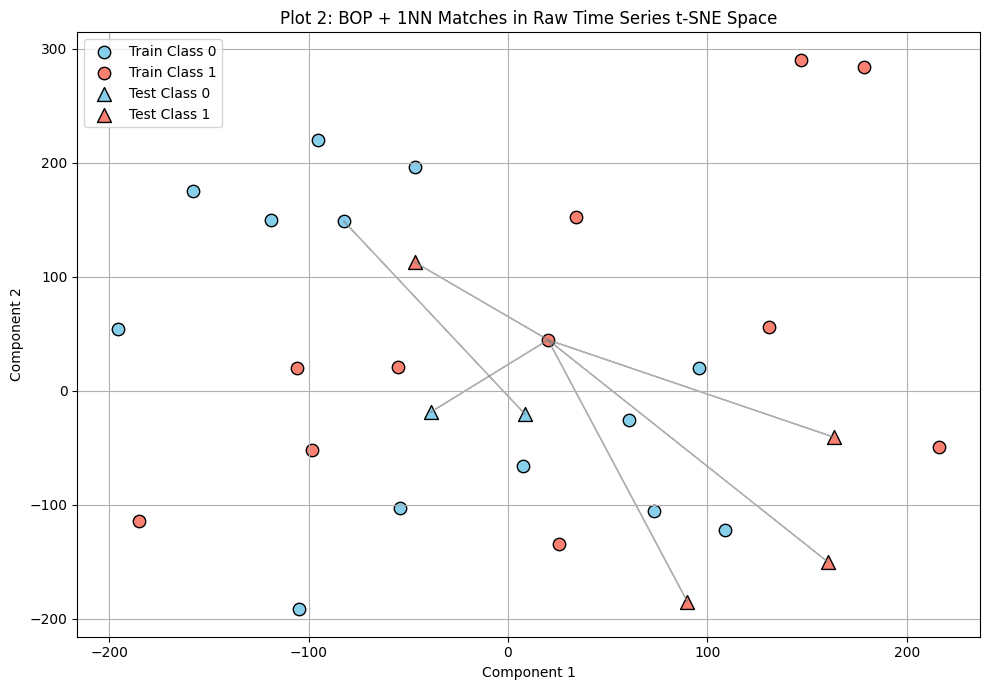

In [ ]:
#@title Plot 2

X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)
X_flat = X_all.reshape(X_all.shape[0], -1)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

n_train = len(X_train)
X_train_2D = X_tsne[:n_train]
X_test_2D = X_tsne[n_train:]

plt.figure(figsize=(10, 7))
colors = ['skyblue', 'salmon']
labels = ['Class 0', 'Class 1']

for class_val in [0, 1]:
    idx = y_train == class_val
    plt.scatter(X_train_2D[idx, 0], X_train_2D[idx, 1],
                color=colors[class_val], label=f'Train Class {class_val}',
                edgecolor='k', marker='o', s=80)

for class_val in [0, 1]:
    idx = y_test == class_val
    plt.scatter(X_test_2D[idx, 0], X_test_2D[idx, 1],
                color=colors[class_val], label=f'Test Class {class_val}',
                edgecolor='black', marker='^', s=100)

for i, nn_idx in enumerate(nn_indices):
    test_point = X_test_2D[i]
    train_point = X_train_2D[nn_idx]

    plt.arrow(test_point[0], test_point[1],
              train_point[0] - test_point[0],
              train_point[1] - test_point[1],
              color='gray', alpha=0.6, head_width=0.6, length_includes_head=True)

plt.title("Plot 2: BOP + 1NN Matches in Raw Time Series t-SNE Space")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

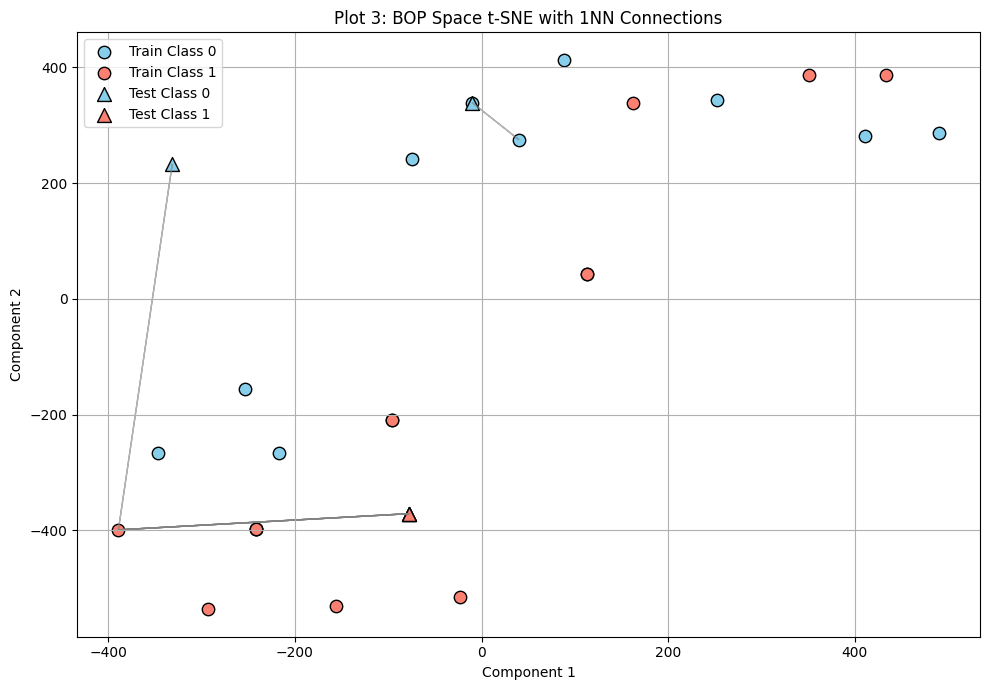

In [ ]:
#@title Plot 3

X_bop_all = np.concatenate((X_train_bop, X_test_bop), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne_bop = tsne.fit_transform(X_bop_all)

n_train = len(X_train_bop)
X_train_bop_2D = X_tsne_bop[:n_train]
X_test_bop_2D = X_tsne_bop[n_train:]

plt.figure(figsize=(10, 7))
colors = ['skyblue', 'salmon']
labels = ['Class 0', 'Class 1']

for class_val in [0, 1]:
    idx = y_train == class_val
    plt.scatter(X_train_bop_2D[idx, 0], X_train_bop_2D[idx, 1],
                color=colors[class_val], label=f'Train Class {class_val}',
                edgecolor='k', marker='o', s=80)

for class_val in [0, 1]:
    idx = y_test == class_val
    plt.scatter(X_test_bop_2D[idx, 0], X_test_bop_2D[idx, 1],
                color=colors[class_val], label=f'Test Class {class_val}',
                edgecolor='black', marker='^', s=100)

for i, nn_idx in enumerate(nn_indices):
    test_point = X_test_bop_2D[i]
    train_point = X_train_bop_2D[nn_idx]

    plt.arrow(test_point[0], test_point[1],
              train_point[0] - test_point[0],
              train_point[1] - test_point[1],
              color='gray', alpha=0.6, head_width=0.6, length_includes_head=True)

plt.title("Plot 3: BOP Space t-SNE with 1NN Connections")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# My code


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def piecewise_aggregate_approximation(tensor, num_segments=10):
    """
    Applies piecewise aggregate approximation to a tensor of shape (samples, dimensions, time_series_length).

    Args:
        tensor (numpy array): Shape (25, 5, 800), representing 25 samples, 5 dimensions, and 800 time points.
        num_segments (int): Number of segments to approximate.

    Returns:
        numpy array: Approximated tensor of shape (25, 5, 800).
    """

    tensor=tensor.numpy()

    samples, dims, time_length = tensor.shape
    approx_tensor = np.empty((samples, dims, num_segments), dtype=object)
    approx_tensor_full = np.empty((samples, dims, num_segments), dtype=object)

    segment_size = time_length // num_segments  # Define segment width

    for i in range(samples):
        for j in range(dims):
            original_signal = tensor[i, j, :]

            # Replace each segment with its mean
            for k in range(num_segments):
                start_idx = k * segment_size
                end_idx = (k + 1) * segment_size if k != num_segments - 1 else time_length

                segment_mean = np.mean(original_signal[start_idx:end_idx])  # Compute segment mean
                approx_tensor[i,j,k]=segment_mean # Assign mean to segment
                approx_tensor_full[start_idx:end_idx]=segment_mean

    return approx_tensor,approx_tensor_full

# Example usage:
# tensor shape (25, 5, 800)

approx_tensor = piecewise_aggregate_approximation(X, num_segments=20)

print(approx_tensor.shape)  # Should be (25, 5, 800)


AttributeError: 'tuple' object has no attribute 'shape'

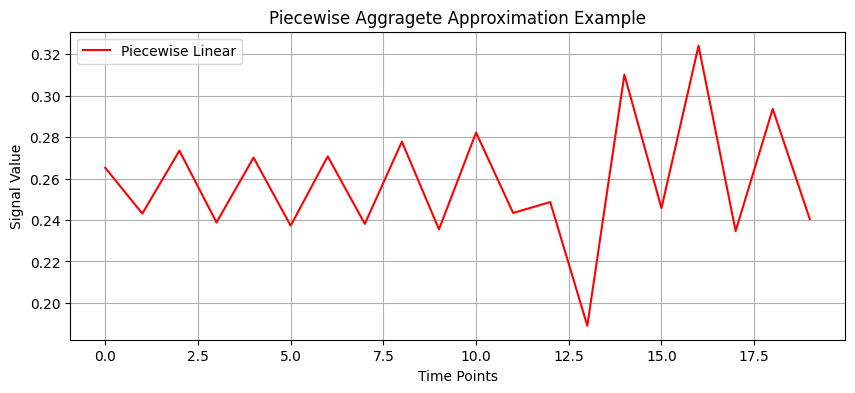

In [ ]:

# Plot an example before and after approximation
sample_idx, dim_idx = 0, 2  # First sample, first dimension
plt.figure(figsize=(10, 4))
#plt.plot(X[sample_idx, dim_idx, :], label="Original", color='blue', alpha=0.5)
plt.plot(approx_tensor[sample_idx, dim_idx, :], label="Piecewise Linear", color='red')
plt.legend()
plt.title("Piecewise Aggragete Approximation Example")
plt.xlabel("Time Points")
plt.ylabel("Signal Value")
plt.grid()
plt.show()


# Symbolic Aggragete Approximation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math
import numpy as np
import math
import torch

class Symbolic_Aggragete_Approximation:
    def __init__(self, num_segments=10, break_points_num=3):
        self.num_segments = num_segments
        self.break_points_num = break_points_num
        self.break_points = {
            3: [-0.43, 0.43],
            4: [-0.67, 0, 0.67],
            5: [-0.84, -0.25, 0.25, 0.84],
            6: [-0.97, -0.43, 0, 0.43, 0.97],
            7: [-1.07, -0.57, -0.18, 0.18, 0.57, 1.07],
            8: [-1.15, -0.67, -0.32, 0, 0.32, 0.67, 1.15],
            9: [-1.22, -0.76, -0.43, -0.14, 0.14, 0.43, 0.76, 1.22],
            10: [-1.28, -0.84, -0.52, -0.25, 0, 0.25, 0.52, 0.84, 1.28]
        }
        self.letters = {
            3: list("ABC"),
            4: list("ABCD"),
            5: list("ABCDE"),
            6: list("ABCDEF"),
            7: list("ABCDEFG"),
            8: list("ABCDEFGH"),
            9: list("ABCDEFGHI"),
            10: list("ABCDEFGHIJ")
        }

    def z_normalize(self, x):
        mean = np.mean(x)
        std = np.std(x)
        return (x - mean) / std if std > 0 else x

    def paa(self, x):
        x = self.z_normalize(x)
        n = len(x)
        seg = self.num_segments
        if n % seg == 0:
            return x.reshape(seg, -1).mean(axis=1)
        else:
            x_new = np.linspace(0, n, seg + 1, dtype=int)
            return np.array([np.mean(x[x_new[i]:x_new[i+1]]) for i in range(seg)])

    def symbolic_approximation(self, tensor):
        """
        Applies PAA and SAX (Symbolic Aggregate Approximation) to a tensor of shape
        (samples, dimensions, time_series_length).

        Args:
            tensor (torch.Tensor): Shape (samples, dims, time_length)

        Returns:
            approx_tensor (np.ndarray): Mean values per segment (samples, dims, num_segments)
            classification_tensor (np.ndarray): Symbolic SAX strings (samples, dims, num_segments)
        """
        num_segments = self.num_segments
        break_points_num = self.break_points_num
        break_points = self.break_points
        letters = self.letters

        tensor = tensor.numpy() if isinstance(tensor, torch.Tensor) else tensor
        num_samples, dims, time_length = tensor.shape

        approx_tensor = np.empty((num_samples, dims, num_segments), dtype=object)
        classification_tensor = np.empty((num_samples, dims, num_segments), dtype=object)

        segment_size = time_length // num_segments

        for i in range(num_samples):  # over samples
            for j in range(dims):     # over dimensions
                original_signal = tensor[i, j, :]
                for k in range(num_segments):  # over segments
                    start_idx = k * segment_size
                    end_idx = (k + 1) * segment_size if k != num_segments - 1 else time_length
                    segment = original_signal[start_idx:end_idx]
                    segment_mean = np.mean(segment)

                    approx_tensor[i, j, k] = segment_mean

                    # Symbolic conversion
                    bp = break_points[break_points_num]
                    syms = letters[break_points_num]

                    if segment_mean < bp[0]:
                        classification_tensor[i, j, k] = syms[0]
                    elif segment_mean > bp[-1]:
                        classification_tensor[i, j, k] = syms[-1]
                    else:
                        for l in range(1, len(bp)):
                            if bp[l - 1] <= segment_mean < bp[l]:
                                classification_tensor[i, j, k] = syms[l]
                                break

        return approx_tensor, classification_tensor

    def symbolic_sequences(self, classification_tensor):
      """
      Converts the SAX classification output into string sequences for each sample and dimension.

      Args:
          classification_tensor (np.ndarray): shape (samples, dims, segments), containing SAX letters

      Returns:
          np.ndarray: shape (samples, dims), each entry is a string like 'ABCCBA...'
      """
      num_samples, dims, num_segments = classification_tensor.shape
      symbolic_strings = np.empty((num_samples, dims), dtype=object)

      for i in range(num_samples):
          for j in range(dims):
              symbolic_strings[i, j] = ''.join(classification_tensor[i, j, :])

      return symbolic_strings


    def dist(self, a, b):
        for key, letters in self.letters.items():
            if a in letters and b in letters:
                r, c = letters.index(a), letters.index(b)
                if abs(r - c) <= 1:
                    return 0
                bp = self.break_points[key]
                return bp[max(r, c) - 1] - bp[min(r, c)]
        raise ValueError("Symbols not found in the same alphabet")

    def mindist(self, q_hat, c_hat, n):
        # q_hat, c_hat: (dims, segs)
        seg = q_hat.shape[1]
        dist_squared = 0.0
        for i in range(q_hat.shape[0]):
            for j in range(seg):
                d = self.dist(q_hat[i, j], c_hat[i, j])
                dist_squared += d ** 2
        return math.sqrt((n / seg) * dist_squared)



# Bop


In [ ]:
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

class BOP:
    def __init__(self, symbolic_sequences, window_size=3):
        """
        Initialize the BOP class with symbolic sequences and a window size.

        Args:
            symbolic_sequences (np.array): Symbolic sequences of shape (samples, dims).
            window_size (int): The length of each "word" in the bag of patterns (default is 3).
        """
        self.symbolic = symbolic_sequences
        self.window_size = window_size
        self.num_samples, self.num_dims = symbolic_sequences.shape
        self.bop_per_dim, self.vectorizers = self.generate_bop_histograms()

    def generate_bop_histograms(self):
        """
        Convert the symbolic sequences into bag-of-patterns histograms.

        Returns:
            bop_per_dim (list of np.array): List of BOP histograms for each dimension.
            vectorizers (list): List of vectorizers for each dimension (to convert histograms to vectors).
        """
        bop_per_dim = [[] for _ in range(self.num_dims)]
        vectorizers = []

        for d in range(self.num_dims):
            histograms = []
            for s in range(self.num_samples):
                seq = self.symbolic[s, d]
                words = [seq[i:i+self.window_size] for i in range(len(seq) - self.window_size + 1)]
                hist = Counter(words)
                histograms.append(hist)

            # Convert histograms to vectors
            vec = DictVectorizer(sparse=False)
            X_bop = vec.fit_transform(histograms)
            bop_per_dim[d] = X_bop
            vectorizers.append(vec)

        return bop_per_dim, vectorizers

    def compare_samples(self, query_idx, dist_metric='euclidean'):
        """
        Compare the specified query sample to all other samples using the chosen distance metric.

        Args:
            query_idx (int): Index of the query sample to compare to all others.
            dist_metric (str): Distance metric to use ('euclidean' or 'cosine').

        Returns:
            distances (np.array): Array of distances between the query sample and all others.
        """
        distances = np.zeros((self.num_dims, self.num_samples))

        for d, bop_matrix in enumerate(self.bop_per_dim):
            # Compute the distance between the query sample and all other samples
            if dist_metric == 'euclidean':
                dist_vector = euclidean_distances(
                    bop_matrix[query_idx].reshape(1, -1),
                    bop_matrix
                ).flatten()
            else:
                raise ValueError("Unsupported distance metric. Only 'euclidean' is supported.")

            distances[d, :] = dist_vector

        return distances

    def get_closest_samples(self, query_idx):
        """
        Get the closest sample(s) to the query sample based on BOP distances.

        Args:
            query_idx (int): Index of the query sample.

        Returns:
            closest_samples (list): List of indices of the closest samples to the query.
        """
        distances = self.compare_samples(query_idx)
        closest_samples = []

        for d in range(self.num_dims):
            closest_idx = np.argmin(distances[d, :])  # Find the closest sample for this dimension
            closest_samples.append(closest_idx)

        return closest_samples

    def get_bop_histograms(self):
        """
        Get the bag-of-patterns histograms for all samples and dimensions.

        Returns:
            bop_per_dim (list): List of histograms for each dimension.
        """
        return self.bop_per_dim


In [ ]:
sax = Symbolic_Aggragete_Approximation(num_segments=20, break_points_num=5)
approx, classif = sax.symbolic_approximation(torch.tensor(X, dtype=torch.float))
symbolic = sax.symbolic_sequences(classif)

# Now, sequences[i, j] is the symbolic string for sample i, dimension j
print(symbolic[0, 0])

In [ ]:
bop = BOP(symbolic_sequences=symbolic,window_size=3)  # symbolic is (30, 4) for example

In [ ]:
histograms = bop.get_bop_histograms()

print("BOP Histograms:")
for dim_idx, hist in enumerate(histograms):
    print(f"Dimension {dim_idx}:")
    print(hist)

In [ ]:
#Create the histogram
import matplotlib.pyplot as plt
for i in range(5):
  plt.hist(classification_tensor_X1[i,:],color='blue',edgecolor='black')
  plt.show()

In [ ]:
# Do a sliding window approach then create the histogram
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


def bop_hist(classification_tensor, window_size):
    dim, points = classification_tensor.shape
    for i in range(dim):
        # Generate sliding windows and convert each to a string (for histogram)
        windows = [''.join(str(x) for x in classification_tensor[i, j:j + window_size])
                   for j in range(points - window_size + 1)]

        # Count frequency of each unique window
        window_counts = Counter(windows)

        # Plot histogram
        plt.figure(figsize=(6, 4))
        plt.bar(window_counts.keys(), window_counts.values())
        plt.xlabel(f"{window_size}-character windows")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Sliding Windows (Row {i})")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
bop_hist(classification_tensor_X1,5)

In [ ]:
for i in range(5):
  plt.plot(X_1[i,:])
  plt.show()
  plt.plot(classification_tensor_X1[i,:])
  plt.show()

Distance Formulas

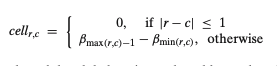

#BOP


In [ ]:
def BOP(classification_tensor,window_size=3):
  plt.histogram(classification_tensor)
  plt.show()


In [ ]:
BOP(X_1 ,3)

In [ ]:
#Import text classification algorithim
import torch
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(classification_tensor, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, dimensions * time_series_length)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)    # Reshape to (samples, dimensions * time_series_length)

# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_reshaped, y_train)  # Use the reshaped data

# Evaluate
y_pred = model.predict(X_test_reshaped)  # Use the reshaped data for prediction
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

In [ ]:
#Making the SAX